In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import numpy as np


print(tf.__version__)

1.13.1


In [40]:
wr_df = pd.read_csv('cascade_2018.csv',low_memory=False)

In [41]:
wr_df.columns

Index(['Unnamed: 0', 'wr_sdate', 'wr_mcode', 'wr_count', 'wr_acount',
       'wr_stren', 'wr_csp', 'wr_nosmp', 'wr_studyno', 'wr_rh'],
      dtype='object')

In [73]:
data  = wr_df[['wr_rh','wr_stren','wr_count']]
data = data[data['wr_stren']!=0.0000]
data = data[data['wr_rh']!=0]

In [74]:
data = data.replace([np.inf, -np.inf], np.nan)

In [75]:
data.isna().sum()

wr_rh       0
wr_stren    0
wr_count    0
dtype: int64

In [76]:
data['wr_rh'].unique()

array([64, 25, 65, 67, 62, 61, 66, 68, 75, 63, 74, 58, 59, 70, 69, 55, 60,
       32, 13, 79, 83, 71], dtype=int64)

In [77]:
data['wr_stren'].unique()

array([ 23.261 ,  23.7901,  21.6163, ..., 168.9557, 175.2014, 179.9744])

In [69]:
#data['wr_rh']  = np.log(data['wr_rh'])

In [78]:
data['wr_rh'].unique()

array([64, 25, 65, 67, 62, 61, 66, 68, 75, 63, 74, 58, 59, 70, 69, 55, 60,
       32, 13, 79, 83, 71], dtype=int64)

In [79]:
data.shape

(163085, 3)

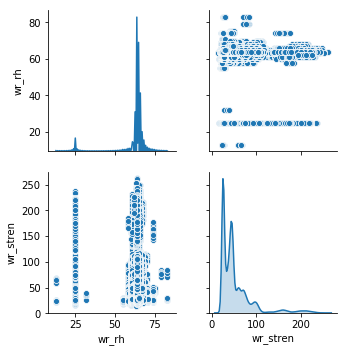

In [80]:
sns.pairplot(data[["wr_rh", "wr_stren"]], diag_kind="kde")

In [81]:
data.head()

,wr_rh,wr_stren,wr_count
25,64,23.2610,92/1CW
26,25,23.7901,100CW
29,64,21.6163,92/1CW
30,25,24.2001,100CW
33,64,23.4373,92/1CW


In [82]:
data['wr_stren'] = (data['wr_stren']-np.mean(data['wr_stren']))/np.std(data['wr_stren'])
data['wr_rh'] = (data['wr_rh']-np.mean(data['wr_rh']))/np.std(data['wr_rh'])

In [83]:
np.mean(data['wr_rh'])

-3.85655098757578e-14

In [84]:
data.iloc[:,:]

,wr_rh,wr_stren,wr_count
25,0.120041,-0.792156,92/1CW
26,-5.993635,-0.777710,100CW
29,0.120041,-0.837062,92/1CW
30,-5.993635,-0.766515,100CW
33,0.120041,-0.787342,92/1CW
40,-5.993635,-0.742437,100CW
41,-5.993635,-0.764888,100CW
42,-5.993635,-0.724802,100CW
43,-5.993635,-0.812983,100CW
44,-5.993635,-0.785715,100CW


In [96]:
labelencoder = LabelEncoder()
data.iloc[:, 2] = labelencoder.fit_transform(data.iloc[:, 2])

In [97]:
data.head()

,wr_rh,wr_stren,wr_count
25,0.120041,-0.792156,45
26,-5.993635,-0.777710,3
29,0.120041,-0.837062,45
30,-5.993635,-0.766515,3
33,0.120041,-0.787342,45


In [98]:
onehotencoder = OneHotEncoder(categorical_features = [2])
encoded = onehotencoder.fit_transform(data).toarray()

C:\Users\VISWA\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\VISWA\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\preprocessing\_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [101]:
# Remove Dummy Variable Trap
encoded = encoded[:,1:]

In [102]:
train_data = encoded[:,:-1]
train_label = encoded[:,-1:]

test_data = encoded[:,:-1]
test_label = encoded[:,-1:]

In [116]:
# Split Train,Test
t_len = int(len(train_data)*.08)
train_data = train_data[:t_len,:]
train_label = train_label[:t_len,:] 
test_data = test_data[t_len:,:]
test_label = test_label[t_len:,:]

In [122]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[47]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [123]:
model = build_model()

In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                3072      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 7,297
Trainable params: 7,297
Non-trainable params: 0
_________________________________________________________________


In [125]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 50

history = model.fit(
  train_data, train_label,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

..................................................

In [126]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
45,0.028363,0.081039,0.028363,0.131497,0.135972,0.131497,45
46,0.028018,0.080573,0.028018,0.140953,0.134351,0.140953,46
47,0.028195,0.080739,0.028195,0.128870,0.132210,0.128870,47
48,0.028069,0.080288,0.028069,0.149410,0.136357,0.149410,48
49,0.027935,0.080841,0.027935,0.155984,0.137833,0.155984,49


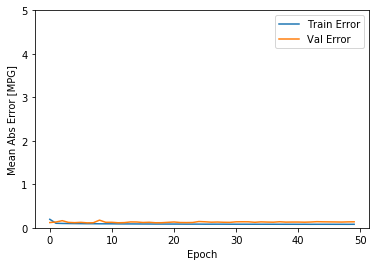

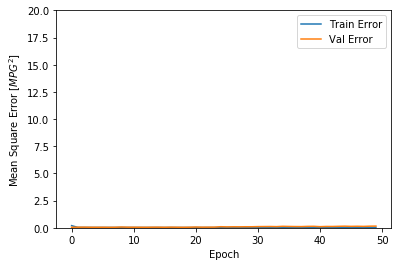

In [127]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)


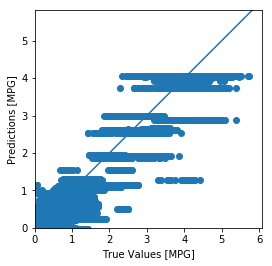

In [129]:
test_predictions = model.predict(test_data).flatten()
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])